In [0]:
from tensorflow.python.client import device_lib

def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

print(get_available_devices())

['/device:CPU:0', '/device:XLA_CPU:0']


In [0]:
file1 = open('drive\My Drive\data\Q1-Graph1.csv', 'r')


## adding the Pandas and Numpy libraries

In [0]:
import pandas as pd
import numpy as np

## Reading the Tamplate file as a pandas dataframe and seeing the description of the data

In [4]:
dfTemplate = pd.read_csv('drive/My Drive/data/CGCS-Template.csv')
dfTemplate.describe()

,Source,eType,Target,Time,Weight,SourceLocation,TargetLocation,SourceLatitude,SourceLongitude,TargetLatitude,TargetLongitude
count,1325.000000,1325.000000,1325.000000,1.325000e+03,1325.000000,301.000000,301.000000,0.0,0.0,0.0,0.0
mean,26209.531321,3.067925,274951.301132,2.366765e+07,1940.946415,3.860465,3.584718,NaN,NaN,NaN,NaN
std,117378.730973,2.308837,284918.246910,1.022014e+07,9884.818945,1.622898,1.692227,NaN,NaN,NaN,NaN
min,0.000000,0.000000,-99.000000,-9.900000e+01,-99.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,39.000000,1.000000,44.000000,1.400550e+07,1.000000,3.000000,3.000000,NaN,NaN,NaN,NaN
50%,45.000000,5.000000,72.000000,3.153600e+07,70.000000,5.000000,4.000000,NaN,NaN,NaN,NaN
75%,59.000000,5.000000,575030.000000,3.153600e+07,1000.000000,5.000000,5.000000,NaN,NaN,NaN,NaN
max,620120.000000,6.000000,657187.000000,3.153600e+07,200000.000000,5.000000,5.000000,NaN,NaN,NaN,NaN


In [0]:
dfTemplate.index

RangeIndex(start=0, stop=1325, step=1)

In [0]:
dfTemplate.dtypes

Source               int64
eType                int64
Target               int64
Time                 int64
Weight               int64
SourceLocation     float64
TargetLocation     float64
SourceLatitude     float64
SourceLongitude    float64
TargetLatitude     float64
TargetLongitude    float64
dtype: object

## Checking the Template data for the data with the location information

In [0]:
print("number of not na values in SourceLocation:   ", len(dfTemplate[dfTemplate["SourceLocation"].notna()]))
print("number of not na values in TargetLocation:   ", len(dfTemplate[dfTemplate["TargetLocation"].notna()]))
print("number of not na values in SourceLatitude:   ", len(dfTemplate[dfTemplate["SourceLatitude"].notna()]))
print("number of not na values in SourceLongitude:   ", len(dfTemplate[dfTemplate["SourceLongitude"].notna()]))
print("number of not na values in TargetLatitude:   ", len(dfTemplate[dfTemplate["TargetLatitude"].notna()]))
print("number of not na values in TargetLongitude:   ", len(dfTemplate[dfTemplate["TargetLongitude"].notna()]))

number of not na values in SourceLocation:    301
number of not na values in TargetLocation:    301
number of not na values in SourceLatitude:    0
number of not na values in SourceLongitude:    0
number of not na values in TargetLatitude:    0
number of not na values in TargetLongitude:    0


In [0]:
len(dfTemplate[dfTemplate["eType"] == 6])

52

In [0]:
for val in dfTemplate[(dfTemplate["eType"] == 1)]["Source"]:
  if val in list(dfTemplate[(dfTemplate["eType"] == 1)]["Target"]):
    pass
    #print("A match is found", end =", ")

In [0]:
for valS, valT in zip(dfTemplate[(dfTemplate["eType"] == 1)]["Source"], dfTemplate[(dfTemplate["eType"] == 1)]["Target"]):
  if valS == valT:
    print("A match is found", end =", ")

In [0]:
for valS, valT in zip(dfTemplate["Source"], dfTemplate["Target"]):
  if valS == valT:
    print("A match is found", end =", ")

In [0]:
dfCategory = pd.read_csv('drive/My Drive/data/DemographicCategories.csv')



In [0]:
categoriesList = dfCategory.to_numpy()
categoriesList.dtype

dtype('O')

In [0]:
categoriesList

array([[459381, 'Water and other public services'],
       [466907, 'Electricity'],
       [473173, 'Household furnishings'],
       [503218, 'Natural gas'],
       [503701, 'Miscellaneous'],
       [510031, 'Gifts'],
       [520660, 'Healthcare'],
       [523927, 'Restaurants'],
       [527449, 'Alcohol'],
       [536346, 'Home maintenance'],
       [537281, 'Housekeeping supplies'],
       [552988, 'Money income before taxes'],
       [567195, 'Personal insurance and pensions'],
       [571970, 'Reading'],
       [575030, 'Transportation'],
       [577992, 'Education'],
       [580426, 'Telephone services'],
       [589943, 'Lodging away from home'],
       [595298, 'Groceries'],
       [595581, 'Donations'],
       [606730, 'Entertainment'],
       [616315, 'Apparel and services'],
       [620120, 'Personal taxes'],
       [621924, 'Mortgage payments'],
       [630626, 'Rented dwellings'],
       [632961, 'Personal care products and services'],
       [640784, 'Tobacco'],
       [64

In [0]:
sourceCategories = list()
targetCategories = list()
for i in range(len(categoriesList)):
  if(categoriesList[i][0] in dfBigGraph["Source"]):
    sourceCategories.append(categoriesList[i][1])
  if(categoriesList[i][0] in dfBigGraph["Target"]):
    targetCategories.append(categoriesList[i][1])

In [0]:
len(sourceCategories)

29

In [0]:
len(targetCategories)

29

In [0]:
sourceTemplate = dfTemplate["Source"].to_numpy()
targetTemplate = dfTemplate["Target"].to_numpy()
sourceCategoriesT = list()
targetCategoriesT = list()
for i in range(len(categoriesList)):
  if(categoriesList[i][0] in sourceTemplate):
    sourceCategoriesT.append(categoriesList[i][1])
  if(categoriesList[i][0] in targetTemplate):
    targetCategoriesT.append(categoriesList[i][1])
print("sourceCategoriesT:   ", sourceCategoriesT)
print("targetCategoriesT:   ", targetCategoriesT)

sourceCategoriesT:    ['Gifts', 'Money income before taxes', 'Personal taxes']
targetCategoriesT:    ['Water and other public services', 'Electricity', 'Household furnishings', 'Natural gas', 'Miscellaneous', 'Healthcare', 'Restaurants', 'Alcohol', 'Home maintenance', 'Housekeeping supplies', 'Personal insurance and pensions', 'Reading', 'Transportation', 'Education', 'Telephone services', 'Lodging away from home', 'Groceries', 'Donations', 'Entertainment', 'Apparel and services', 'Personal taxes', 'Mortgage payments', 'Rented dwellings', 'Personal care products and services', 'Tobacco', 'Household operations', 'Property taxes']


In [0]:
510031 in sourceTemplate

True

In [0]:
len(targetCategoriesT)

27

In [0]:
sourceCategoriesT

['Gifts', 'Money income before taxes', 'Personal taxes']

In [0]:
type(dfTemplate["Source"])

pandas.core.series.Series

## Loading the big graph with the Pandas datafarame

In [40]:
dfBigGraph = pd.read_csv('drive/My Drive/data/CGCS-GraphData.csv')
dfBigGraph.describe()

,Source,eType,Target,Time,Weight,SourceLocation,TargetLocation,SourceLatitude,SourceLongitude,TargetLatitude,TargetLongitude
count,1.238953e+08,1.238953e+08,1.238953e+08,1.238953e+08,1.238953e+08,7.215359e+07,7.215359e+07,7.215359e+07,7.215359e+07,7.215359e+07,7.215359e+07
mean,5.566990e+05,7.490687e-01,5.571470e+05,1.505715e+07,6.460121e+01,2.400772e+00,2.405289e+00,5.936289e-01,-3.621679e+01,6.262336e-01,-3.643658e+01
std,5.794484e+04,9.638940e-01,5.799030e+04,3.047018e+07,2.870352e+03,1.766937e+00,1.769288e+00,2.391271e+01,1.080029e+02,2.387852e+01,1.081189e+02
min,4.567590e+05,0.000000e+00,4.567590e+05,-2.702016e+09,-1.000000e+00,0.000000e+00,0.000000e+00,-3.789420e+01,-1.793750e+02,-3.789420e+01,-1.793750e+02
25%,5.066630e+05,0.000000e+00,5.071510e+05,8.212526e+06,1.000000e+00,1.000000e+00,1.000000e+00,-2.441490e+01,-1.584460e+02,-2.440350e+01,-1.588930e+02
50%,5.566020e+05,1.000000e+00,5.574750e+05,1.619336e+07,1.000000e+00,2.000000e+00,2.000000e+00,3.914150e-01,-4.081200e+01,4.157700e-01,-4.082980e+01
75%,6.065080e+05,1.000000e+00,6.073850e+05,2.410743e+07,1.000000e+00,4.000000e+00,4.000000e+00,2.379140e+01,8.754490e+01,2.374010e+01,8.736400e+01
max,6.576680e+05,6.000000e+00,6.576700e+05,3.153600e+07,8.166740e+06,5.000000e+00,5.000000e+00,4.983240e+01,1.633690e+02,4.983240e+01,1.633690e+02


In [0]:
type(dfBigGraph)

pandas.core.frame.DataFrame

In [0]:
dfBigGraph.index

RangeIndex(start=0, stop=123895261, step=1)

In [0]:
dfBigGraph.columns

Index(['Source', 'eType', 'Target', 'Time', 'Weight', 'SourceLocation',
       'TargetLocation', 'SourceLatitude', 'SourceLongitude', 'TargetLatitude',
       'TargetLongitude'],
      dtype='object')

In [0]:
dfBigGraph.dtypes

Source               int64
eType                int64
Target               int64
Time                 int64
Weight             float64
SourceLocation     float64
TargetLocation     float64
SourceLatitude     float64
SourceLongitude    float64
TargetLatitude     float64
TargetLongitude    float64
dtype: object

In [0]:
print("number of not na values in SourceLocation:   ", len(dfBigGraph[dfBigGraph["SourceLocation"].notna()]))
print("number of not na values in TargetLocation:   ", len(dfBigGraph[dfBigGraph["TargetLocation"].notna()]))
print("number of not na values in SourceLatitude:   ", len(dfBigGraph[dfBigGraph["SourceLatitude"].notna()]))
print("number of not na values in SourceLongitude:   ", len(dfBigGraph[dfBigGraph["SourceLongitude"].notna()]))
print("number of not na values in TargetLatitude:   ", len(dfBigGraph[dfBigGraph["TargetLatitude"].notna()]))
print("number of not na values in TargetLongitude:   ", len(dfBigGraph[dfBigGraph["TargetLongitude"].notna()]))

number of not na values in SourceLocation:    72153591
number of not na values in TargetLocation:    72153591
number of not na values in SourceLatitude:    72153591
number of not na values in SourceLongitude:    72153591
number of not na values in TargetLatitude:    72153591
number of not na values in TargetLongitude:    72153591


In [0]:
dgBigGraph02 = dfBigGraph[dfBigGraph[]]

In [0]:
len(dfBigGraph[dfBigGraph["eType"] == 0])

48662103

In [0]:
print("number of rows with eType = 0 is:", len(dfBigGraph[dfBigGraph["eType"] == 0]))
print("number of rows with eType = 1 is:", len(dfBigGraph[dfBigGraph["eType"] == 1]))
print("number of rows with eType = 2 is:", len(dfBigGraph[dfBigGraph["eType"] == 2]))
print("number of rows with eType = 3 is:", len(dfBigGraph[dfBigGraph["eType"] == 3]))
print("number of rows with eType = 4 is:", len(dfBigGraph[dfBigGraph["eType"] == 4]))
print("number of rows with eType = 5 is:", len(dfBigGraph[dfBigGraph["eType"] == 5]))
print("number of rows with eType = 6 is:", len(dfBigGraph[dfBigGraph["eType"] == 6]))

number of rows with eType = 0 is: 48662103
number of rows with eType = 1 is: 70661593
number of rows with eType = 2 is: 389211
number of rows with eType = 3 is: 389211
number of rows with eType = 4 is: 259304
number of rows with eType = 5 is: 2041841
number of rows with eType = 6 is: 1491998


In [0]:
dfBigGraph["Source"].describe().apply("{0:.1f}".format)

count    123895261.0
mean        556699.0
std          57944.8
min         456759.0
25%         506663.0
50%         556602.0
75%         606508.0
max         657668.0
Name: Source, dtype: object

## Finding unique vlaues of Source and Target for each channel:

In [0]:
print("Number of unique values for Source column in the whole data: ", len(dfBigGraph["Source"].drop_duplicates()))
print("Number of unique values for Source column in eType = 0 or 1: ", 
      len(dfBigGraph[(dfBigGraph["eType"] == 0) | (dfBigGraph["eType"] == 1)]["Source"].drop_duplicates()))
print("Number of unique values for Source column in eType = 2 or 3: ", 
      len(dfBigGraph[(dfBigGraph["eType"] == 2) | (dfBigGraph["eType"] == 3)]["Source"].drop_duplicates()))
print("Number of unique values for Source column in eType = 4: ", 
      len(dfBigGraph[dfBigGraph["eType"] == 4]["Source"].drop_duplicates()))
print("Number of unique values for Source column in eType = 5: ", 
      len(dfBigGraph[dfBigGraph["eType"] == 5]["Source"].drop_duplicates()))
print("Number of unique values for Source column in eType = 6: ", 
      len(dfBigGraph[dfBigGraph["eType"] == 6]["Source"].drop_duplicates()))

Number of unique values for Source column in the whole data:  164537
Number of unique values for Source column in eType = 0 or 1:  100000
Number of unique values for Source column in eType = 2 or 3:  3814
Number of unique values for Source column in eType = 4:  66173
Number of unique values for Source column in eType = 5:  100003
Number of unique values for Source column in eType = 6:  50189


In [0]:
print("Number of unique values for Target column in the whole data: ", len(dfBigGraph["Target"].drop_duplicates()))
print("Number of unique values for Target column in eType = 0 or 1: ", 
      len(dfBigGraph[(dfBigGraph["eType"] == 0) | (dfBigGraph["eType"] == 1)]["Target"].drop_duplicates()))
print("Number of unique values for Target column in eType = 2 or 3: ", 
      len(dfBigGraph[(dfBigGraph["eType"] == 2) | (dfBigGraph["eType"] == 3)]["Target"].drop_duplicates()))
print("Number of unique values for Target column in eType = 4: ", 
      len(dfBigGraph[dfBigGraph["eType"] == 4]["Target"].drop_duplicates()))
print("Number of unique values for Target column in eType = 5: ", 
      len(dfBigGraph[dfBigGraph["eType"] == 5]["Target"].drop_duplicates()))
print("Number of unique values for Target column in eType = 6: ", 
      len(dfBigGraph[dfBigGraph["eType"] == 6]["Target"].drop_duplicates()))

Number of unique values for Target column in the whole data:  136324
Number of unique values for Target column in eType = 0 or 1:  100000
Number of unique values for Target column in eType = 2 or 3:  2721
Number of unique values for Target column in eType = 4:  33570
Number of unique values for Target column in eType = 5:  100027
Number of unique values for Target column in eType = 6:  6


In [0]:
print("The number of unique Node Id's in the whole dataset:   ", 
      len(list(dict.fromkeys((list(dfBigGraph["Target"].drop_duplicates()) + list(dfBigGraph["Source"].drop_duplicates()))))))

The number of unique Node Id's in the whole dataset:    200860


In [0]:
list(dfBigGraph["Target"][0:5]) + list(dfBigGraph["Source"][0:5])

[643327,
 643327,
 643327,
 643327,
 549896,
 639754,
 603100,
 577847,
 466246,
 633499]

In [0]:
list([1,2,3]) + list([1,4,5])

[1, 2, 3, 1, 4, 5]

In [0]:
dfBigGraph["Target"].describe().apply("{0:.1f}".format)

count    123895261.0
mean        557147.0
std          57990.3
min         456759.0
25%         507151.0
50%         557475.0
75%         607385.0
max         657670.0
Name: Target, dtype: object

In [0]:
print("Number of unique values for Target column: ", len(dfBigGraph["Target"].drop_duplicates()))

Number of unique values for Target column:  136324


In [0]:
# Difference between the maximum id number and minimun id number in the Target column
657670 - 456759

200911

In [0]:
dfBigGraph[dfBigGraph["eType"] == 6].to_csv(r'drive/My Drive/data/eType6.csv', index = False)

In [0]:
dfBigGraph[dfBigGraph["eType"] == 5][["Source", "Target", "eType"]].size

6125523

In [0]:
dfBigGraph[dfBigGraph["eType"] <= 1].to_csv(r'drive/My Drive/data/eType01.csv', index = False)

In [0]:
dfBigGraph[dfBigGraph["eType"] == 5].to_csv(r'drive/My Drive/data/eType5.csv', index = False)

In [0]:
dfBigGraph[dfBigGraph["eType"] == 4].to_csv(r'drive/My Drive/data/eType4.csv', index = False)

In [0]:
dfBigGraph[(dfBigGraph["eType"] == 2) & (dfBigGraph["eType"] == 3)].to_csv(r'drive/My Drive/data/eType23.csv', index = False)

In [0]:
import numpy as np

In [0]:
print(len(dfBigGraph[(dfBigGraph["Source"] == 456759)]))
print(len(dfBigGraph[(dfBigGraph["Target"] == 456759)]))

649
857


In [0]:
TargetListUnique = 

In [0]:
len(dfBigGraph[(dfBigGraph["eType"] == 2) | (dfBigGraph["eType"] == 3)])

778422

In [19]:
dfGraph1 = pd.read_csv('drive/My Drive/data/Q1-Graph1.csv')
dfGraph1.describe()

,Source,eType,Target,Time,Weight,SourceLocation,TargetLocation,SourceLatitude,SourceLongitude,TargetLatitude,TargetLongitude
count,1216.000000,1216.000000,1216.000000,1.216000e+03,1216.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,566372.039474,3.800987,566665.756579,2.582598e+07,5441.277440,1.321429,1.363095,6.367095,-31.987527,4.170833,-17.573504
std,54790.757705,2.059174,57964.828278,2.169591e+07,39348.326934,1.461364,1.416014,27.973519,74.766545,26.369127,81.208493
min,463777.000000,0.000000,459381.000000,-6.620413e+08,0.166667,0.000000,0.000000,-29.000000,-165.000000,-29.000000,-165.000000
25%,512397.000000,1.000000,523927.000000,2.283846e+07,1.000000,0.000000,0.000000,-24.565700,-110.650000,-22.000000,-48.670100
50%,570411.000000,5.000000,577992.000000,3.153600e+07,655.195000,0.000000,2.000000,27.202500,-39.026000,1.000000,-37.807600
75%,616050.000000,5.000000,620120.000000,3.153600e+07,2474.707500,3.000000,2.000000,34.295800,-34.537200,30.448300,89.421700
max,654981.000000,6.000000,657187.000000,3.153600e+07,900735.000000,5.000000,5.000000,35.880600,156.000000,35.880600,156.000000


In [20]:
dfGraph2 = pd.read_csv('drive/My Drive/data/Q1-Graph2.csv')
dfGraph2.describe()

,Source,eType,Target,Time,Weight,SourceLocation,TargetLocation,SourceLatitude,SourceLongitude,TargetLatitude,TargetLongitude
count,1300.000000,1300.000000,1300.000000,1.300000e+03,1300.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,560520.766154,3.451538,562980.933846,2.417665e+07,1207.345301,2.910448,2.930348,-12.048256,-91.897215,-12.701554,-85.900864
std,51698.445422,2.199438,57359.193017,2.862774e+07,6359.973484,1.265678,1.210423,14.429280,89.174134,13.219904,95.522699
min,464459.000000,0.000000,459381.000000,-7.327279e+08,0.018868,0.000000,1.000000,-29.452400,-166.186000,-29.452400,-168.472000
25%,527597.000000,1.000000,515794.000000,2.273466e+07,1.000000,2.000000,2.000000,-25.422000,-162.983000,-25.422000,-162.983000
50%,552988.000000,5.000000,575030.000000,3.153600e+07,216.695000,3.000000,3.000000,-3.886060,-111.678000,-20.656500,-111.678000
75%,602912.000000,5.000000,620120.000000,3.153600e+07,754.660000,4.000000,4.000000,-1.160670,-13.373000,-1.160670,-9.461840
max,656156.000000,6.000000,657173.000000,3.153600e+07,196567.000000,4.000000,4.000000,33.000000,91.000000,6.715180,91.784100


In [21]:
dfGraph3 = pd.read_csv('drive/My Drive/data/Q1-Graph3.csv')
dfGraph3.describe()

,Source,eType,Target,Time,Weight,SourceLocation,TargetLocation,SourceLatitude,SourceLongitude,TargetLatitude,TargetLongitude
count,729.000000,729.000000,729.000000,7.290000e+02,729.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,549315.914952,3.980796,556662.437586,2.567313e+07,3725.984499,2.579545,2.250000,-7.726644,-23.875210,-6.859568,-20.845032
std,45556.232718,1.995782,53774.796932,1.288329e+07,13582.721364,1.566324,1.440386,21.339780,111.798051,22.110683,106.346714
min,464459.000000,0.000000,459381.000000,-2.097426e+08,0.100000,0.000000,0.000000,-29.171400,-165.000000,-29.171400,-165.000000
25%,516236.000000,5.000000,520084.000000,1.988484e+07,3.000000,1.000000,1.000000,-25.000000,-161.276000,-23.595300,-111.000000
50%,542649.000000,5.000000,567195.000000,3.153600e+07,507.470000,2.000000,2.000000,-22.000000,-13.000000,-21.141100,-26.695200
75%,578531.000000,5.000000,595581.000000,3.153600e+07,2277.900000,4.000000,4.000000,2.351660,91.000000,5.911780,91.000000
max,657076.000000,6.000000,657173.000000,3.153600e+07,159997.000000,5.000000,5.000000,33.000000,156.000000,33.574100,156.000000


In [22]:
dfGraph4 = pd.read_csv('drive/My Drive/data/Q1-Graph4.csv')
dfGraph4.describe()

,Source,eType,Target,Time,Weight,SourceLocation,TargetLocation,SourceLatitude,SourceLongitude,TargetLatitude,TargetLongitude
count,732.000000,732.000000,732.000000,7.320000e+02,732.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000
mean,557659.424863,4.463115,568696.844262,2.647806e+07,2154.421899,2.085227,2.534091,3.742113,-23.205082,0.518587,-35.924931
std,55986.115278,1.694121,56402.324558,8.937597e+06,8797.584281,1.829475,1.766021,26.361056,99.451602,25.551081,106.740120
min,464579.000000,0.000000,459381.000000,9.858600e+04,-1.000000,0.000000,0.000000,-29.676400,-165.000000,-35.603400,-168.957000
25%,510031.000000,5.000000,527449.000000,2.642541e+07,3.000000,0.000000,1.000000,-24.992800,-111.000000,-25.000000,-111.000000
50%,566580.000000,5.000000,577992.000000,3.153600e+07,337.480000,2.000000,3.000000,2.400530,-41.000000,1.000000,-41.778000
75%,585606.000000,5.000000,620120.000000,3.153600e+07,1370.210000,3.250000,4.000000,33.000000,91.000000,22.107250,-11.437250
max,657526.000000,6.000000,657526.000000,3.153600e+07,141744.000000,5.000000,5.000000,39.888600,156.000000,39.888600,156.256000


In [23]:
dfGraph5 = pd.read_csv('drive/My Drive/data/Q1-Graph5.csv')
dfGraph5.describe()

,Source,eType,Target,Time,Weight,SourceLocation,TargetLocation,SourceLatitude,SourceLongitude,TargetLatitude,TargetLongitude
count,395.000000,395.000000,395.000000,3.950000e+02,395.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,553140.425316,4.635443,566074.437975,2.345357e+07,2758.468684,2.354839,2.717742,-6.986791,-37.910244,6.701998,-13.750998
std,52601.721710,1.565413,55398.542187,1.037842e+07,22597.362966,1.432455,1.990059,22.733813,103.415153,23.400234,119.389382
min,477657.000000,0.000000,459381.000000,9.634600e+04,-1.000000,0.000000,0.000000,-29.000000,-170.646000,-29.000000,-170.646000
25%,510031.000000,5.000000,523927.000000,1.494720e+07,1.000000,2.000000,1.000000,-25.000000,-111.000000,-22.000000,-111.000000
50%,552988.000000,5.000000,567195.000000,3.153600e+07,198.000000,2.500000,3.000000,-22.000000,-41.000000,22.000000,-41.000000
75%,594308.000000,6.000000,616453.000000,3.153600e+07,983.360000,3.000000,5.000000,1.000000,91.000000,23.280775,152.200000
max,631903.000000,6.000000,657173.000000,3.153600e+07,441206.000000,5.000000,5.000000,33.000000,156.000000,33.000000,156.000000


In [0]:
sourceG1 = dfGraph1["Source"].to_numpy()
targetG1 = dfGraph1["Target"].to_numpy()
sourceCategoriesG1 = list()
targetCategoriesG1 = list()
for i in range(len(categoriesList)):
  if(categoriesList[i][0] in sourceG1):
    sourceCategoriesG1.append(categoriesList[i][1])
  if(categoriesList[i][0] in targetG1):
    targetCategoriesG1.append(categoriesList[i][1])
print("sourceCategoriesG1:   ", len(sourceCategoriesG1), sourceCategoriesG1)
print("targetCategoriesG1:   ", len(targetCategoriesG1), targetCategoriesG1)

sourceCategoriesG1:    3 ['Gifts', 'Money income before taxes', 'Personal taxes']
targetCategoriesG1:    27 ['Water and other public services', 'Electricity', 'Household furnishings', 'Natural gas', 'Miscellaneous', 'Healthcare', 'Restaurants', 'Alcohol', 'Home maintenance', 'Housekeeping supplies', 'Personal insurance and pensions', 'Reading', 'Transportation', 'Education', 'Telephone services', 'Lodging away from home', 'Groceries', 'Donations', 'Entertainment', 'Apparel and services', 'Personal taxes', 'Mortgage payments', 'Rented dwellings', 'Personal care products and services', 'Tobacco', 'Household operations', 'Property taxes']


In [0]:
sourceG1 = dfGraph2["Source"].to_numpy()
targetG1 = dfGraph2["Target"].to_numpy()
sourceCategoriesG1 = list()
targetCategoriesG1 = list()
for i in range(len(categoriesList)):
  if(categoriesList[i][0] in sourceG1):
    sourceCategoriesG1.append(categoriesList[i][1])
  if(categoriesList[i][0] in targetG1):
    targetCategoriesG1.append(categoriesList[i][1])
print("sourceCategoriesG1:   ", len(sourceCategoriesG1), sourceCategoriesG1)
print("targetCategoriesG1:   ", len(targetCategoriesG1), targetCategoriesG1)

sourceCategoriesG1:    3 ['Gifts', 'Money income before taxes', 'Personal taxes']
targetCategoriesG1:    27 ['Water and other public services', 'Electricity', 'Household furnishings', 'Natural gas', 'Miscellaneous', 'Healthcare', 'Restaurants', 'Alcohol', 'Home maintenance', 'Housekeeping supplies', 'Personal insurance and pensions', 'Reading', 'Transportation', 'Education', 'Telephone services', 'Lodging away from home', 'Groceries', 'Donations', 'Entertainment', 'Apparel and services', 'Personal taxes', 'Mortgage payments', 'Rented dwellings', 'Personal care products and services', 'Tobacco', 'Household operations', 'Property taxes']


In [0]:
sourceG1 = dfGraph3["Source"].to_numpy()
targetG1 = dfGraph3["Target"].to_numpy()
sourceCategoriesG1 = list()
targetCategoriesG1 = list()
for i in range(len(categoriesList)):
  if(categoriesList[i][0] in sourceG1):
    sourceCategoriesG1.append(categoriesList[i][1])
  if(categoriesList[i][0] in targetG1):
    targetCategoriesG1.append(categoriesList[i][1])
print("sourceCategoriesG1:   ", len(sourceCategoriesG1), sourceCategoriesG1)
print("targetCategoriesG1:   ", len(targetCategoriesG1), targetCategoriesG1)

sourceCategoriesG1:    3 ['Gifts', 'Money income before taxes', 'Personal taxes']
targetCategoriesG1:    27 ['Water and other public services', 'Electricity', 'Household furnishings', 'Natural gas', 'Miscellaneous', 'Healthcare', 'Restaurants', 'Alcohol', 'Home maintenance', 'Housekeeping supplies', 'Personal insurance and pensions', 'Reading', 'Transportation', 'Education', 'Telephone services', 'Lodging away from home', 'Groceries', 'Donations', 'Entertainment', 'Apparel and services', 'Personal taxes', 'Mortgage payments', 'Rented dwellings', 'Personal care products and services', 'Tobacco', 'Household operations', 'Property taxes']


In [0]:
sourceG1 = dfGraph4["Source"].to_numpy()
targetG1 = dfGraph4["Target"].to_numpy()
sourceCategoriesG1 = list()
targetCategoriesG1 = list()
for i in range(len(categoriesList)):
  if(categoriesList[i][0] in sourceG1):
    sourceCategoriesG1.append(categoriesList[i][1])
  if(categoriesList[i][0] in targetG1):
    targetCategoriesG1.append(categoriesList[i][1])
print("sourceCategoriesG1:   ", len(sourceCategoriesG1), sourceCategoriesG1)
print("targetCategoriesG1:   ", len(targetCategoriesG1), targetCategoriesG1)

sourceCategoriesG1:    3 ['Gifts', 'Money income before taxes', 'Personal taxes']
targetCategoriesG1:    27 ['Water and other public services', 'Electricity', 'Household furnishings', 'Natural gas', 'Miscellaneous', 'Healthcare', 'Restaurants', 'Alcohol', 'Home maintenance', 'Housekeeping supplies', 'Personal insurance and pensions', 'Reading', 'Transportation', 'Education', 'Telephone services', 'Lodging away from home', 'Groceries', 'Donations', 'Entertainment', 'Apparel and services', 'Personal taxes', 'Mortgage payments', 'Rented dwellings', 'Personal care products and services', 'Tobacco', 'Household operations', 'Property taxes']


In [0]:
sourceG1 = dfGraph5["Source"].to_numpy()
targetG1 = dfGraph5["Target"].to_numpy()
sourceCategoriesG1 = list()
targetCategoriesG1 = list()
for i in range(len(categoriesList)):
  if(categoriesList[i][0] in sourceG1):
    sourceCategoriesG1.append(categoriesList[i][0])
  if(categoriesList[i][0] in targetG1):
    targetCategoriesG1.append(categoriesList[i][0])
print("sourceCategoriesG1:   ", len(sourceCategoriesG1), sourceCategoriesG1)
print("targetCategoriesG1:   ", len(targetCategoriesG1), targetCategoriesG1)

sourceCategoriesG1:    3 [510031, 552988, 620120]
targetCategoriesG1:    27 [459381, 466907, 473173, 503218, 503701, 520660, 523927, 527449, 536346, 537281, 567195, 571970, 575030, 577992, 580426, 589943, 595298, 595581, 606730, 616315, 620120, 621924, 630626, 632961, 640784, 642329, 644226]


In [0]:
for val in dfGraph1[(dfGraph1["eType"] == 6)]["Source"]:
  if val in list(dfGraph1[(dfGraph1["eType"] == 6)]["Target"]):
    print("A match is found", end =", ")

In [0]:
'''for val in dfGraph2[(dfGraph2["eType"] == 0) | (dfGraph2["eType"] == 1)]["Source"]:
  if val in list(dfGraph2[(dfGraph2["eType"] == 0)]["Target"]):
    pass
    #print("A match is found", end =", ")'''

'for val in dfGraph2[(dfGraph2["eType"] == 0) | (dfGraph2["eType"] == 1)]["Source"]:\n  if val in list(dfGraph2[(dfGraph2["eType"] == 0)]["Target"]):\n    pass\n    #print("A match is found", end =", ")'

In [0]:
import networkx as nx

In [0]:
G = nx.Graph()

In [0]:
templateG = nx.Graph()
graph1G = nx.Graph()
graph2G = nx.Graph()
graph3G = nx.Graph()
graph4G = nx.Graph()
graph5G = nx.Graph()

In [8]:
G.number_of_nodes()

0

In [0]:
G.number_of_edges()

969311

In [0]:
sampleFromBigGraph01 = dfBigGraph.iloc[0:10000000,[0,2]]
sampleFromBigGraph01

,Source,Target
0,639754,643327
1,603100,643327
2,577847,643327
3,466246,643327
4,633499,549896
...,...,...
9999995,590886,646983
9999996,646983,544934
9999997,544934,590886
9999998,590886,642119


In [0]:
templateNodesTuple = [tuple([x, y]) for x, y in zip(dfTemplate["Source"], dfTemplate["Target"])]
graph1NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph1["Source"], dfGraph1["Target"])]
graph2NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph2["Source"], dfGraph2["Target"])]
graph3NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph3["Source"], dfGraph3["Target"])]
graph4NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph4["Source"], dfGraph4["Target"])]
graph5NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph5["Source"], dfGraph5["Target"])]

In [0]:
templateG.add_edges_from(templateNodesTuple)
graph1G.add_edges_from(graph1NodesTuple)
graph2G.add_edges_from(graph2NodesTuple)
graph3G.add_edges_from(graph3NodesTuple)
graph4G.add_edges_from(graph4NodesTuple)
graph5G.add_edges_from(graph5NodesTuple)

In [0]:
sampleFromBigGraph01Tuple = [tuple([x, y]) for x, y in zip(sampleFromBigGraph01["Source"], sampleFromBigGraph01["Target"])]

In [0]:
G.add_edges_from(sampleFromBigGraph01Tuple)

In [0]:
G.add_edges_from([tuple([x, y]) for x, y in zip(sampleFromBigGraph01["Source"], sampleFromBigGraph01["Target"])])

NameError: ignored

In [0]:
import matplotlib.pyplot as plt

In [0]:
plt.subplot(111)
nx.draw(G, with_labels=True, font_weight='bold')

## clustering the big graph

In [0]:
nx.clustering(G)

{639754: 0,
 643327: 0,
 603100: 0,
 577847: 0,
 466246: 0,
 633499: 0,
 549896: 0,
 536338: 0,
 506129: 0,
 582418: 0,
 537465: 0,
 558475: 0,
 642742: 0,
 585738: 0,
 496688: 0,
 458795: 0,
 536493: 0,
 539811: 0,
 495590: 0,
 504565: 0,
 465310: 0,
 457241: 0,
 534696: 0,
 515046: 0,
 515099: 0,
 542132: 0,
 585190: 0,
 582425: 0,
 625416: 0,
 625418: 0,
 609861: 0,
 493731: 0,
 471568: 0,
 639798: 0,
 641804: 0,
 466769: 0,
 622827: 0,
 531307: 0,
 611035: 0,
 647978: 0,
 528109: 0,
 460585: 0,
 477905: 0,
 625069: 0,
 565374: 0,
 502653: 0,
 524234: 0,
 629303: 0,
 536507: 0,
 635126: 0,
 479302: 0,
 641215: 0,
 512723: 0,
 516708: 0,
 555924: 0,
 549991: 0,
 577442: 0,
 531406: 0,
 596046: 0,
 498107: 0,
 620474: 0,
 612437: 0,
 548538: 0,
 458006: 0,
 499683: 0,
 577504: 0,
 497104: 0,
 506053: 0,
 564782: 0,
 642281: 0,
 467896: 0,
 466884: 0,
 533670: 0,
 542030: 0,
 636349: 0,
 625092: 0,
 516174: 0,
 526586: 0,
 568810: 0,
 535532: 0,
 516088: 0,
 625467: 0,
 621215: 0,
 633

In [0]:
templateGraphClusters = nx.clustering(templateG)

## drawing the network graphs of the template and all the graphs

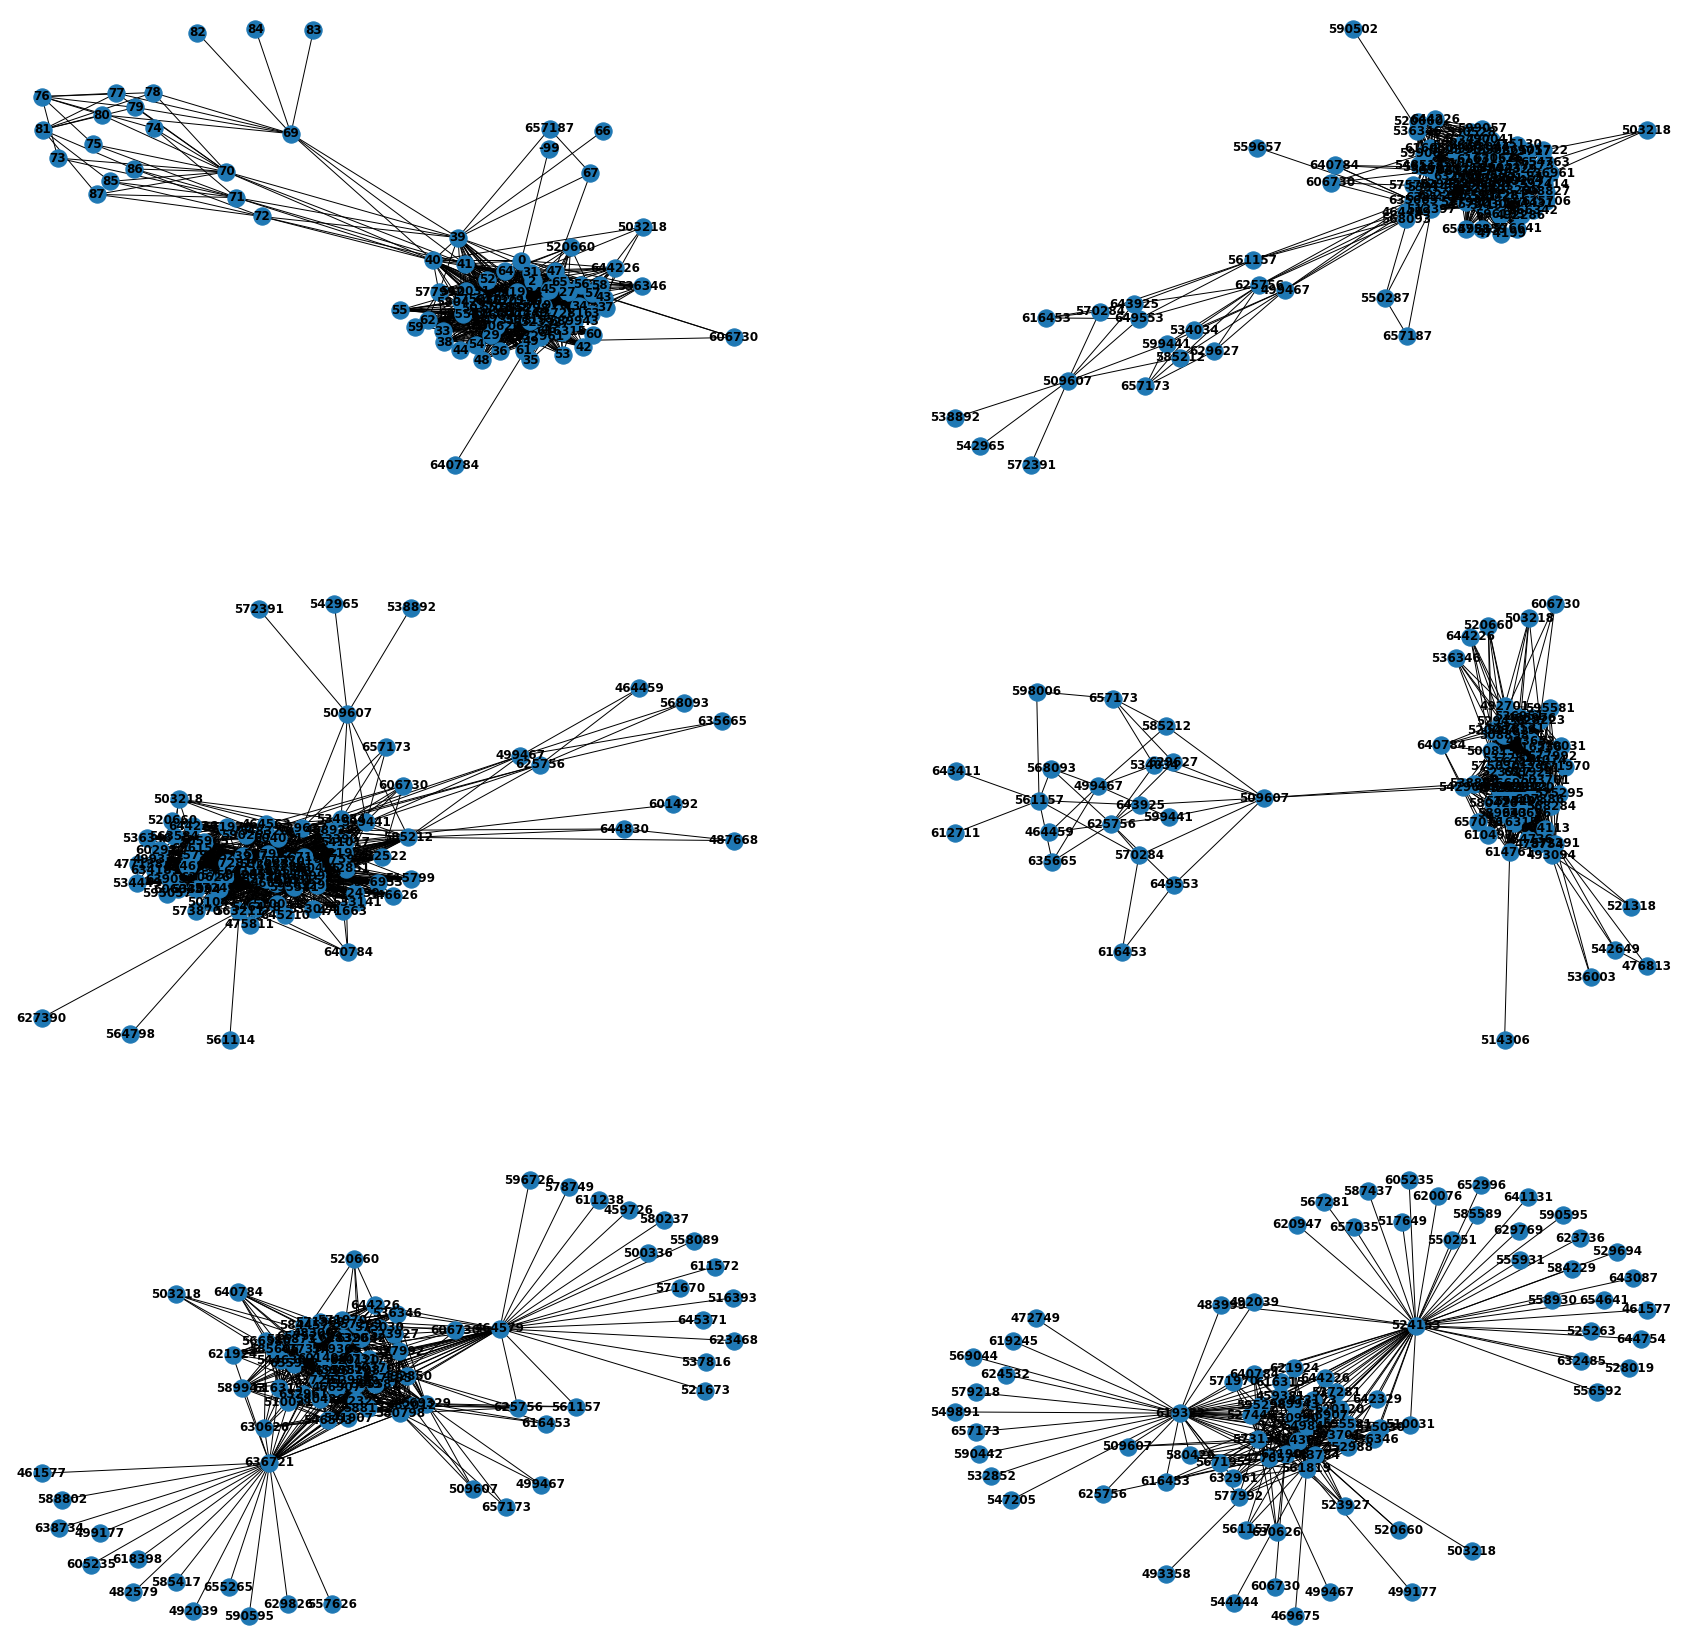

In [38]:
f = plt.figure(figsize=(30,30))
#ax = f.add_subplot(121)
#ax2 = f.add_subplot(122)
plt.subplot(321)
nx.draw(templateG, with_labels=True, font_weight='bold')
plt.subplot(322)
nx.draw(graph1G, with_labels=True, font_weight='bold')
plt.subplot(323)
nx.draw(graph2G, with_labels=True, font_weight='bold')
plt.subplot(324)
nx.draw(graph3G, with_labels=True, font_weight='bold')
plt.subplot(325)
nx.draw(graph4G, with_labels=True, font_weight='bold')
plt.subplot(326)
nx.draw(graph5G, with_labels=True, font_weight='bold')

## drawing the network graphs of the template and all the graphs NO Labels

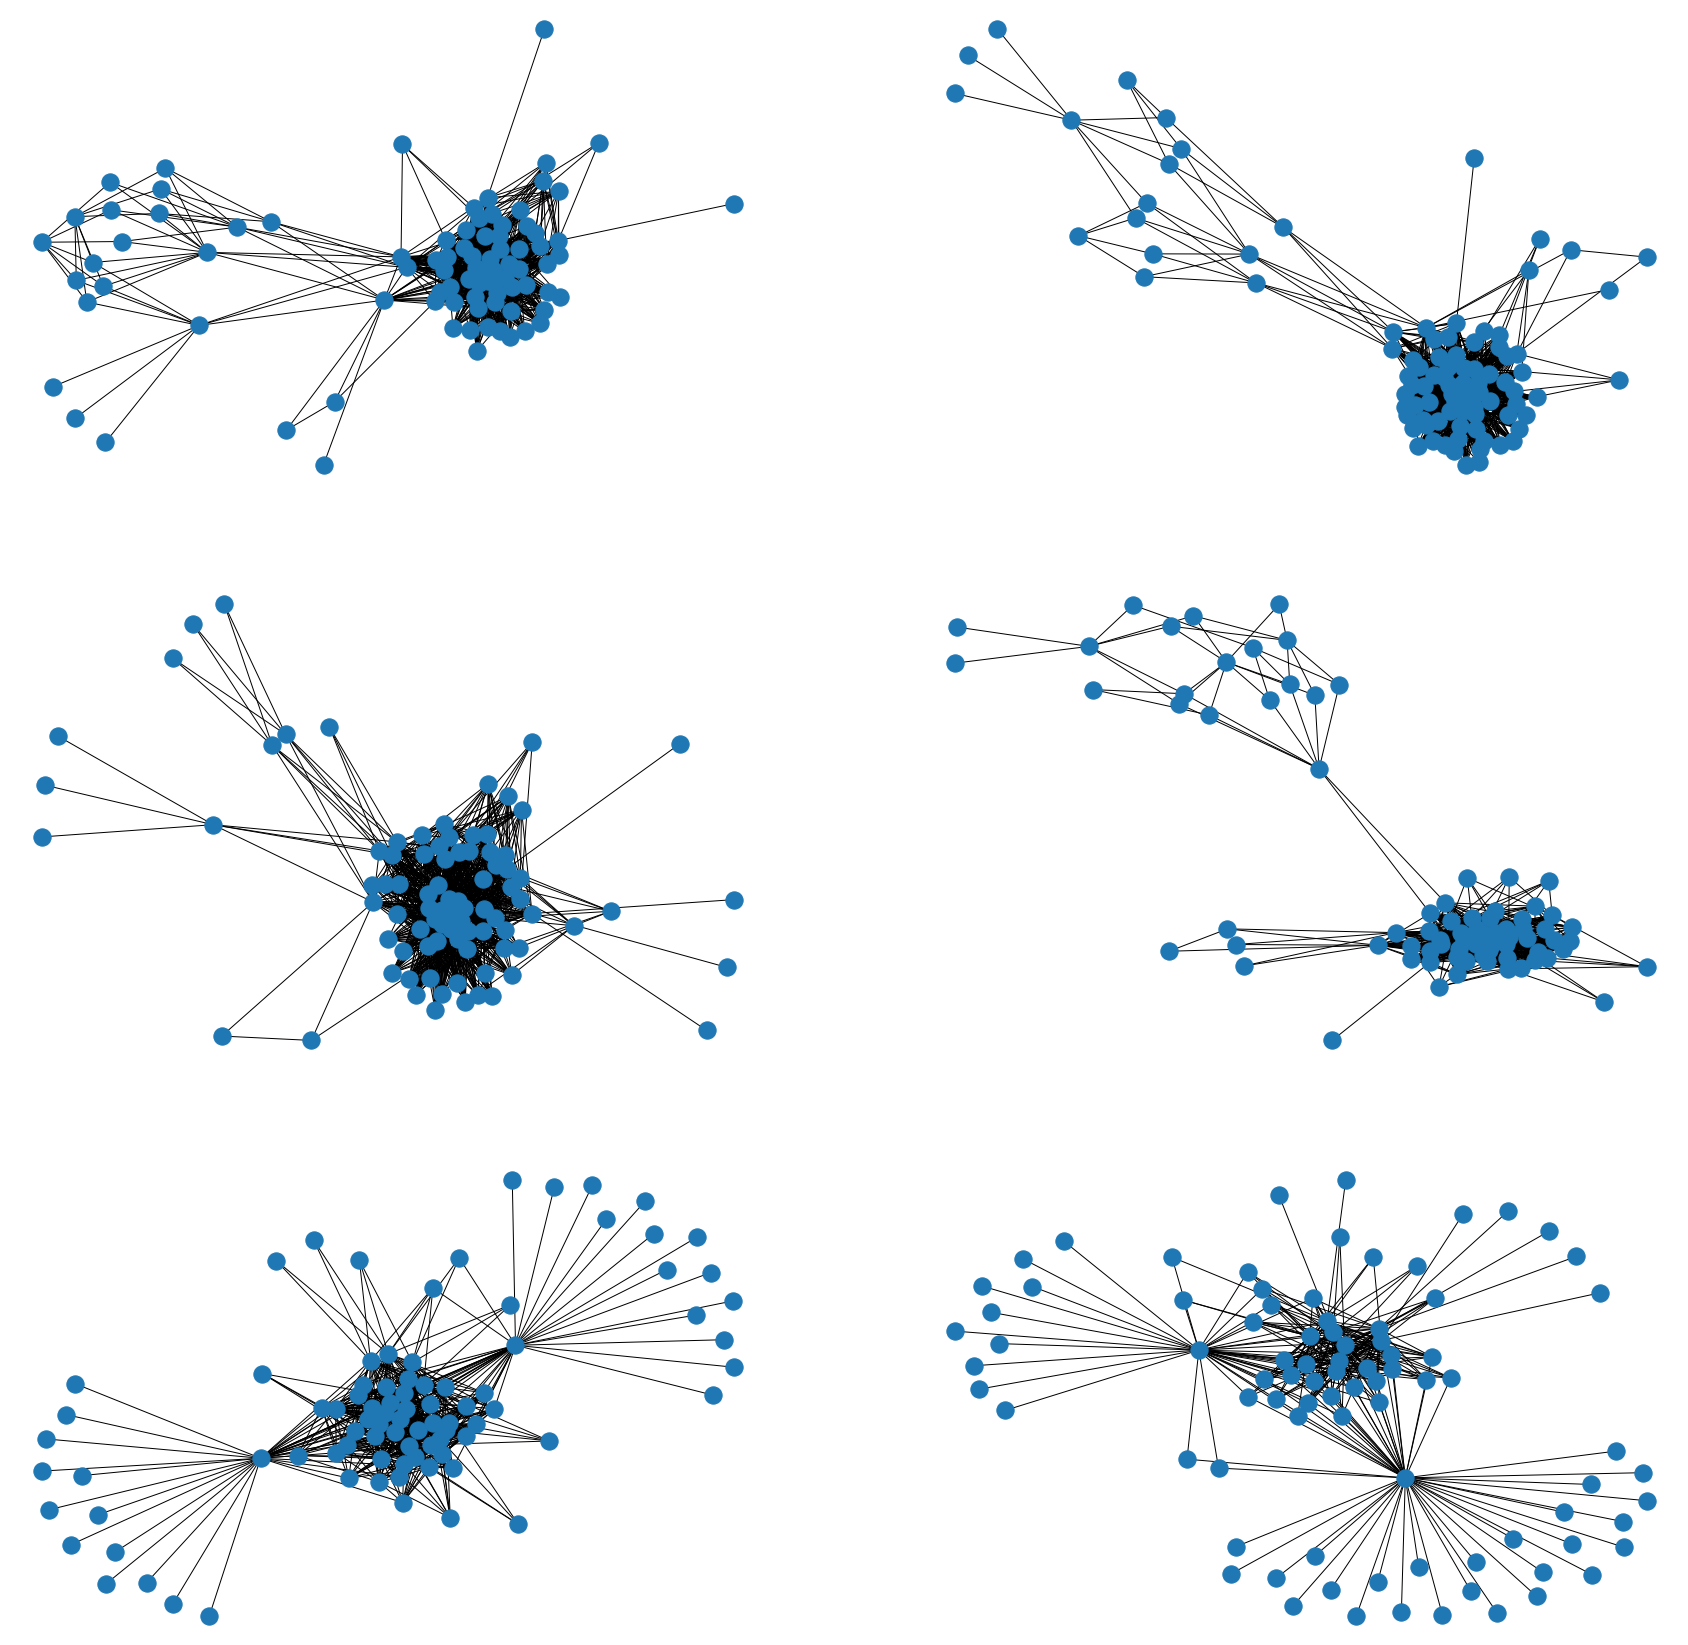

In [39]:
f = plt.figure(figsize=(30,30))
#ax = f.add_subplot(121)
#ax2 = f.add_subplot(122)
plt.subplot(321)
nx.draw(templateG, with_labels=False, font_weight='bold')
plt.subplot(322)
nx.draw(graph1G, with_labels=False, font_weight='bold')
plt.subplot(323)
nx.draw(graph2G, with_labels=False, font_weight='bold')
plt.subplot(324)
nx.draw(graph3G, with_labels=False, font_weight='bold')
plt.subplot(325)
nx.draw(graph4G, with_labels=False, font_weight='bold')
plt.subplot(326)
nx.draw(graph5G, with_labels=False, font_weight='bold')